# Statistiche e grafici delle risoluzioni dei cubi di Rubik

In [46]:
from pandas import read_csv
import matplotlib.pyplot as plt
import rubik_library

df = read_csv("../database.csv", sep="\t")

In [47]:
def media_ultime_5(dataframe):
# Calcola la media delle ultime 5 risoluzioni di un certo tipo di cubo
    ultime_5 = dataframe.tail(5)["Secondi"]
    media_soluzioni, tempi_totali = 0, 0
    for tempo in ultime_5:
        tempi_totali = tempi_totali + tempo
    media_soluzioni = tempi_totali / 5
    media_in_minuti = rubik_library.conversione_secondi(media_soluzioni)
    print("Media delle ultime 5 risoluzioni:", media_in_minuti)

In [48]:
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(rubik_library.conversione_secondi))

In [49]:
# Ultime 10 risoluzioni
df.tail(10)

,Data,Secondi,Tempo,Cubo
198,2025-11-14,269.69,"(4, 29.69)",4x4
199,2025-11-14,225.73,"(3, 45.73)",4x4
200,2026-01-10,384.44,"(6, 24.44)",Mirror
201,2026-01-10,48.48,"(0, 48.48)",2x2
202,2026-01-10,101.49,"(1, 41.49)",2x2
203,2026-01-10,21.43,"(0, 21.43)",2x2
204,2026-01-10,65.97,"(1, 5.97)",3x3
205,2026-01-10,40.44,"(0, 40.44)",3x3
206,2026-01-10,53.02,"(0, 53.02)",3x3
207,2026-01-10,242.95,"(4, 2.95)",4x4


# Record personali per tipo di cubo 🥇🥈🥉

In [50]:
# Record personali per tipo di cubo

lista_indice_record = [] 
tipi_cubo = df["Cubo"].drop_duplicates()
for tipo_cubo in tipi_cubo:
    indice = df[df["Cubo"] == tipo_cubo].sort_values("Secondi").head(1).index
    lista_indice_record.append(indice[0])

df[["Data", "Tempo", "Cubo"]].iloc[lista_indice_record]

,Data,Tempo,Cubo
205,2026-01-10,"(0, 40.44)",3x3
84,2025-03-21,"(0, 15.12)",2x2
112,2025-05-28,"(3, 58.89)",Mirror
156,2025-08-30,"(7, 59.65)",5x5
157,2025-09-21,"(3, 30.86)",4x4
48,2025-02-09,"(30, 10.61)",Megaminx


In [51]:
# Oppure si puo fare anche in questo modo
df.groupby(by="Cubo").min().sort_values(by="Secondi").drop(columns=["Data", "Secondi"])
# Senza il drop avrebbe mostrato la data sbagliata in quanto prende pure la data minima in quanto applica min su tutte le colonne
# Anche la colonna Tempo non ha i risultati in ordine per questo motivo

,Tempo
Cubo,
2x2,"(0, 15.12)"
3x3,"(0, 40.44)"
4x4,"(3, 30.86)"
Mirror,"(3, 58.89)"
5x5,"(7, 59.65)"
Megaminx,"(30, 10.61)"


In [52]:
# Oppure si puo fare anche in questo altro modo
df.groupby(by="Cubo")["Tempo"].min()

Cubo
2x2          (0, 15.12)
3x3          (0, 40.44)
4x4          (3, 30.86)
5x5          (7, 59.65)
Megaminx    (30, 10.61)
Mirror       (3, 58.89)
Name: Tempo, dtype: object

Text(0.5, 0, 'Cubi')

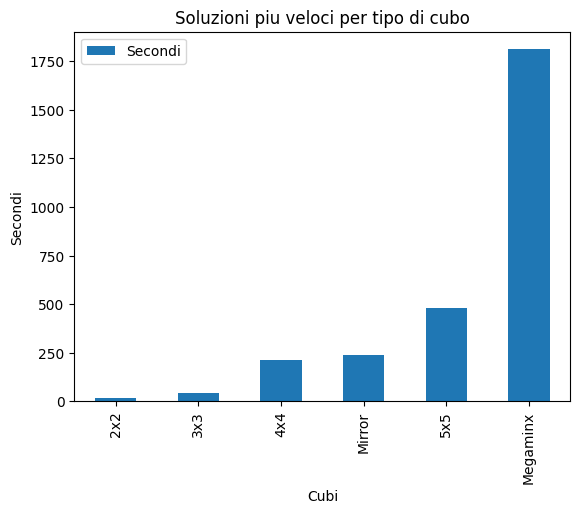

In [53]:
df.groupby(by="Cubo").min().sort_values(by="Secondi").plot.bar()
plt.title("Soluzioni piu veloci per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [54]:
# Medie dei tempi di risoluzione
medie_df = df.groupby(by="Cubo")["Secondi"].mean().round(2)
medie_df

Cubo
2x2           60.92
3x3           71.97
4x4          266.74
5x5          727.32
Megaminx    2155.38
Mirror       520.58
Name: Secondi, dtype: float64

In [55]:
# Medie dei tempi di risoluzione in minuti e secondi
print("Cubo Minuti")
for i, s in medie_df.items():
    print(i, rubik_library.conversione_secondi(s))

Cubo Minuti
2x2 (1, 0.92)
3x3 (1, 11.97)
4x4 (4, 26.74)
5x5 (12, 7.32)
Megaminx (35, 55.38)
Mirror (8, 40.58)


Text(0.5, 0, 'Cubi')

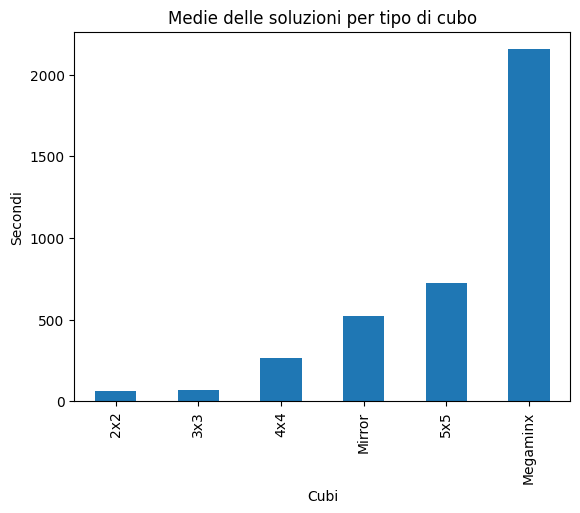

In [56]:
df.groupby(by="Cubo")["Secondi"].mean().sort_values().plot.bar()
plt.title("Medie delle soluzioni per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [57]:
# Numero di volte che ho risolto i cubi
df["Cubo"].value_counts()

Cubo
3x3         71
2x2         53
4x4         48
5x5         24
Mirror       9
Megaminx     3
Name: count, dtype: int64

Text(0.5, 0, 'Cubi')

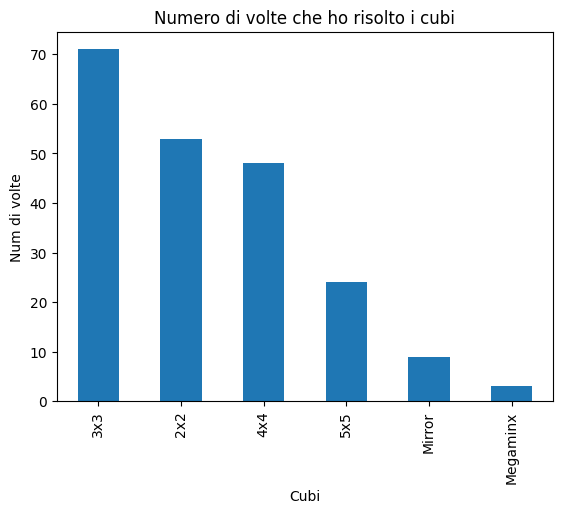

In [58]:
df["Cubo"].value_counts().plot.bar()
plt.title("Numero di volte che ho risolto i cubi")
plt.ylabel("Num di volte")
plt.xlabel("Cubi")

In [59]:
# Detaframe delle soluzioni del cubo 2x2
df_2x2 = df[df["Cubo"] == "2x2"].sort_values(by="Secondi")
# df_2x2

In [60]:
# Detaframe delle soluzioni del cubo 3x3
df_3x3 = df[df["Cubo"] == "3x3"].sort_values(by="Secondi")
# df_3x3

In [61]:
# Detaframe delle soluzioni del cubo 4x4
df_4x4 = df[df["Cubo"] == "4x4"].sort_values(by="Secondi")
# df_4x4

In [62]:
# Detaframe delle soluzioni del cubo 5x5
df_5x5 = df[df["Cubo"] == "5x5"].sort_values(by="Secondi")
# df_5x5

In [63]:
media_ultime_5(df_5x5)

Media delle ultime 5 risoluzioni: (15, 51.82)
